In [1]:
import os,sys,inspect
currentdir = os.getcwd()
parentdir = os.path.dirname(currentdir)
sys.path.insert(0,parentdir)

In [12]:
from utils.ss_to_image import final_crop
from core.emoji_to_name import emoji_2_name
from core.image_to_emoji import image_2_emoji_2
import matplotlib.pyplot as plt
import cv2
import numpy as np
import pickle

In [3]:
file_path = '../../resource/screenshots/Arka.jpeg'

cropped_image= final_crop(file_path)
img = cropped_image

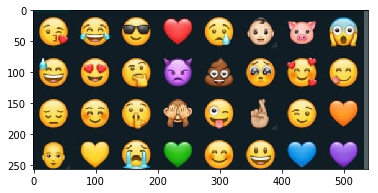

In [4]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

In [5]:
os.getcwd()

'/media/subhasish/Professional/emoji_project/code/notebooks'

In [6]:
directory = '../' # this made my day !!
os.chdir(directory) 

### Names obtained through CV2 template matching

In [7]:
emoji_list = emoji_2_name(img)

In [18]:
# [:, :, 1]
emoji_list

['face-throwing-a-kiss',
 'face-with-tears-of-joy',
 'smiling-face-with-sunglasses',
 'heavy-black-heart',
 'crying-face',
 'nauseated-face',
 'blue-heart',
 'face-screaming-in-fear',
 'smiling-face-with-open-mouth-and-cold-sweat',
 'smiling-face-with-heart-shaped-eyes',
 'thinking-face',
 'imp',
 'pile-of-poo',
 'face-with-pleading-eyes',
 'smiling-face-with-smiling-eyes-and-three-hearts',
 'face-savouring-delicious-food',
 'pensive-face',
 'white-smiling-face',
 'face-with-finger-covering-closed-lips',
 'see-no-evil-monkey',
 'face-with-stuck-out-tongue-and-winking-eye',
 'hand-with-index-and-middle-fingers-crossed',
 'winking-face',
 'orange-heart',
 'nauseated-face',
 'yellow-heart',
 'loudly-crying-face',
 'green-heart',
 'smiling-face-with-smiling-eyes',
 'smiling-face-with-open-mouth',
 'blue-heart',
 'purple-heart']

In [9]:
# [:, :, 0]

emoji_list

['face-throwing-a-kiss',
 'face-with-tears-of-joy',
 'smiling-face-with-sunglasses',
 'heavy-black-heart',
 'crying-face',
 'sparkling-heart',
 'growing-heart',
 'face-screaming-in-fear',
 'smiling-face-with-open-mouth-and-cold-sweat',
 'smiling-face-with-heart-shaped-eyes',
 'thinking-face',
 'imp',
 'pile-of-poo',
 'face-with-pleading-eyes',
 'smiling-face-with-smiling-eyes-and-three-hearts',
 'face-savouring-delicious-food',
 'pensive-face',
 'white-smiling-face',
 'face-with-finger-covering-closed-lips',
 'see-no-evil-monkey',
 'face-with-stuck-out-tongue-and-winking-eye',
 'hand-with-index-and-middle-fingers-crossed',
 'winking-face',
 'yellow-heart',
 'nauseated-face',
 'heavy-black-heart',
 'loudly-crying-face',
 'orange-heart',
 'smiling-face-with-smiling-eyes',
 'smiling-face-with-open-mouth',
 'purple-heart',
 'purple-heart']

### New approach (Manual)

In [13]:
emojis = image_2_emoji_2(img)

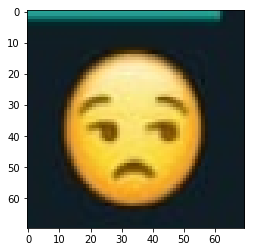

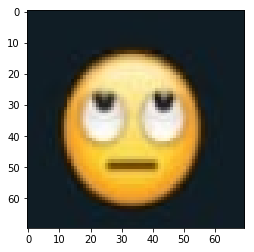

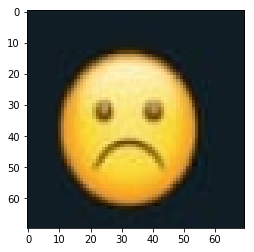

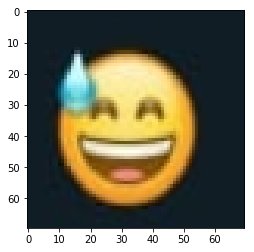

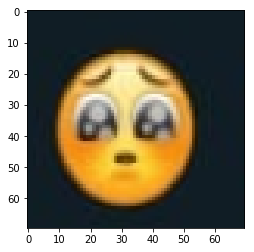

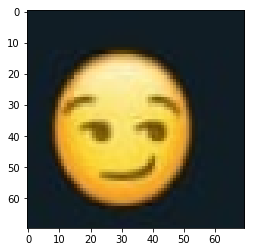

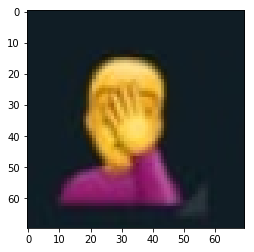

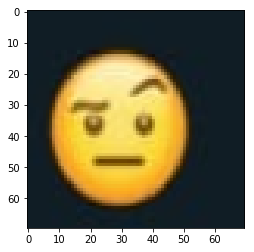

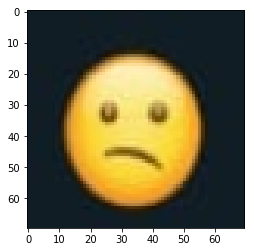

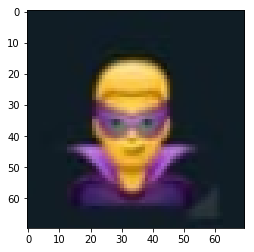

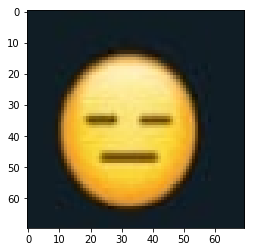

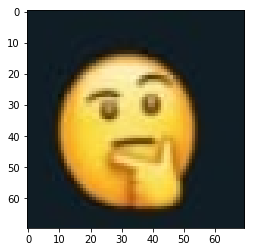

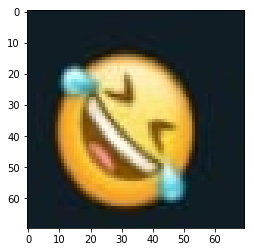

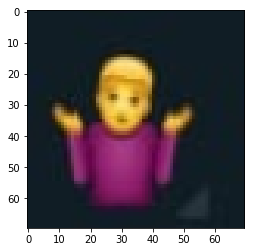

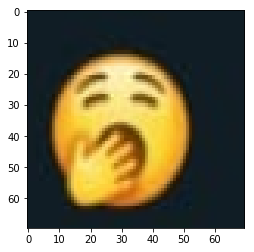

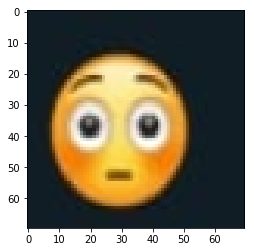

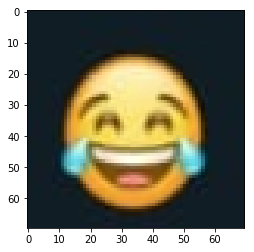

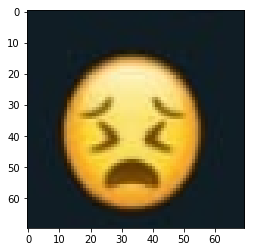

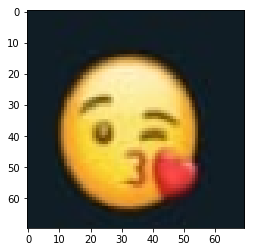

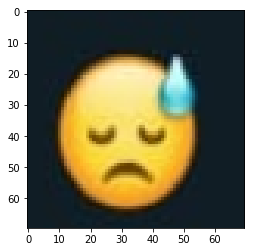

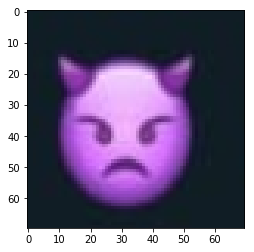

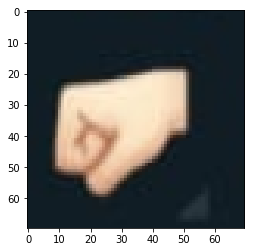

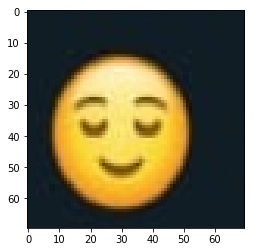

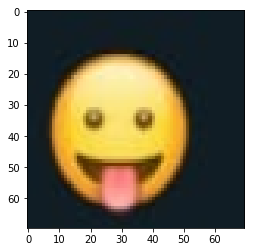

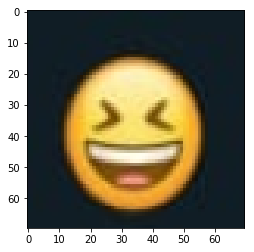

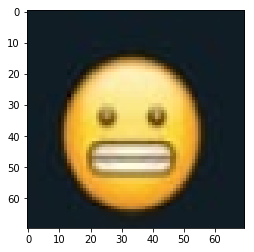

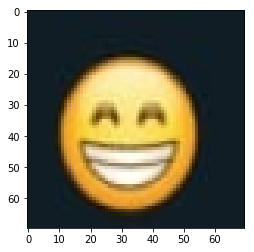

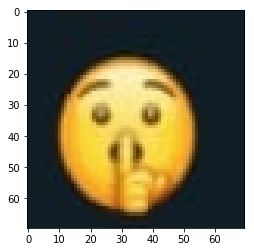

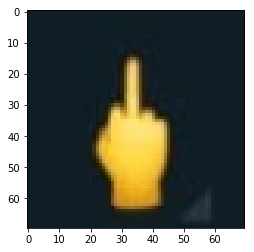

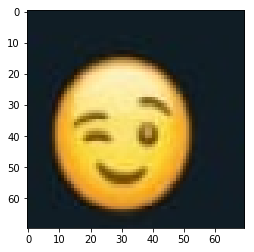

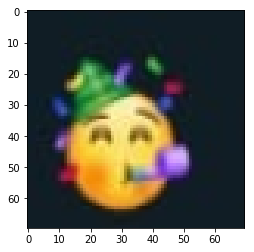

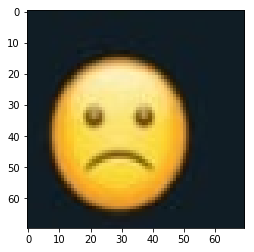

In [15]:
for i in emojis:
    plt.imshow(cv2.cvtColor(i, cv2.COLOR_BGR2RGB))
    plt.show()

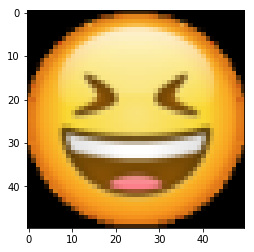

In [33]:
### Template import
temp_file_name = '../../resource/emoji_database/smiling-face-with-open-mouth-and-tightly-closed-eyes_1f606.png'
template = cv2.imread(temp_file_name)

dim = (50,50)
template = cv2.resize(template, dim, interpolation = cv2.INTER_AREA) 

plt.imshow(cv2.cvtColor(template, cv2.COLOR_BGR2RGB))
plt.show()

In [40]:
template.shape

(50, 50, 3)

In [56]:
img = emojis[0]
for i in range(20):
    for j in range(20):
        sample = img[i:i+50,j:j+50]

In [70]:
(sample - template)[:, :, 2]

array([[ 85, 132, 181, ...,  16,  16,  16],
       [138, 186, 225, ...,  16,  16,  16],
       [188, 229, 250, ...,  16,  16,  16],
       ...,
       [ 13,  12,  13, ...,  16,  16,  16],
       [ 14,  14,  13, ...,  16,  16,  16],
       [ 15,  14,  14, ...,  16,  16,  16]], dtype=uint8)

### DEEP

In [132]:
# emoji to name
def unit_emoji_to_name(emoji, method = 'cv2.TM_SQDIFF_NORMED'):
    emoji_score = 2**100
    output = None
    for i in os.listdir('../../resource/emoji_database'):

            template = cv2.imread('../../resource/emoji_database/' + str(i))
            dim = (50,50)
            template = cv2.resize(template, dim, interpolation = cv2.INTER_AREA) 

            res = cv2.matchTemplate(emoji[:, :, 0] ,template[:, :, 0],eval(method))

            min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
            if emoji_score > min_val:
                    emoji_score = min_val
                    output = i
    return output


#### Creating emoji_dict
maps emojis from the database to indices

In [146]:
emoji_index_dict = {}
c = 0
for i in os.listdir('../../resource/emoji_database'):
    emoji_index_dict[i] = c
    c += 1

In [152]:
import pickle

In [153]:
with open('../../lib/emoji_index_dict.pickle', 'wb') as handle:
    pickle.dump(emoji_index_dict, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [154]:
with open('../../lib/emoji_index_dict.pickle', 'rb') as handle:
    emoji_index_dict = pickle.load(handle)

In [155]:
len(emoji_index_dict)

187

In [107]:
emoji_list_de_grande = []

### Manually labelling the emojis

In [125]:
os.getcwd()

'/media/subhasish/Professional/emoji_project/code/notebooks'

In [109]:
file_path = '../../resource/screenshots/'
list_dir = os.listdir(file_path)

In [110]:
list_dir.remove('light_theme')

In [111]:
list_dir

['Anirban.jpeg',
 'aritra.jpeg',
 'Arka.jpeg',
 'Rohan.jpeg',
 'Subhasish',
 'Trisha']

In [112]:
for i in list_dir:
    if os.path.isdir(os.path.join(file_path, i)):
        for j in os.listdir(os.path.join(file_path, i)):
            file_path_1 = os.path.join(os.path.join(file_path, i), j)
            cropped_image= final_crop(file_path_1)
            img = cropped_image
            emoji_list_de_grande += image_2_emoji_2(img)
    else:
        file_path_1 = os.path.join(file_path, i)
        cropped_image= final_crop(file_path_1)
        img = cropped_image
        emoji_list_de_grande += image_2_emoji_2(img)

In [116]:
emoji_list_de_grande = np.array(emoji_list_de_grande)

In [423]:
### Dumping emoji_list_de_grande


with open('../../lib/emoji_list_de_grande.pickle', 'wb') as handle:
    pickle.dump(emoji_list_de_grande, handle, protocol=pickle.HIGHEST_PROTOCOL)


In [156]:
predicted_indices_100 = []
predicted_indices_200 = []
predicted_indices_300 = []
predicted_indices_400 = []
predicted_indices_500 = []

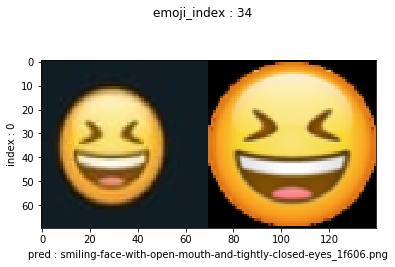

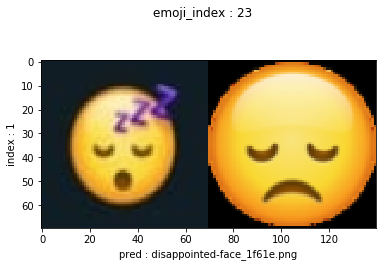

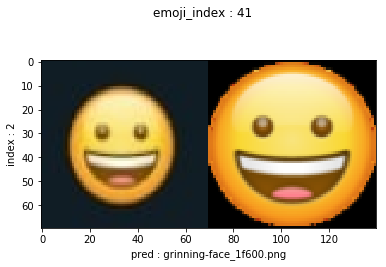

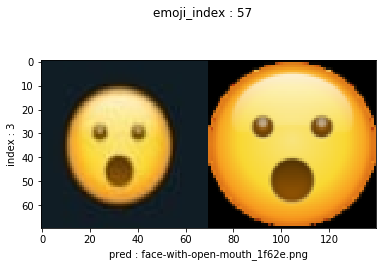

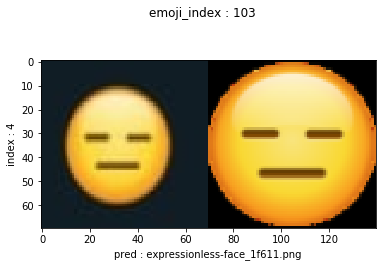

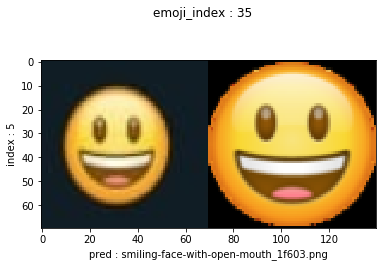

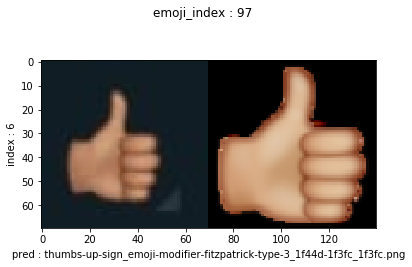

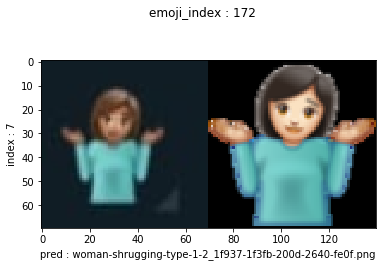

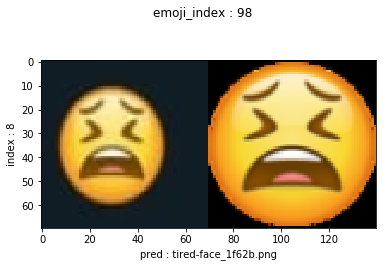

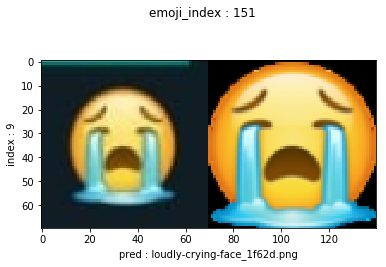

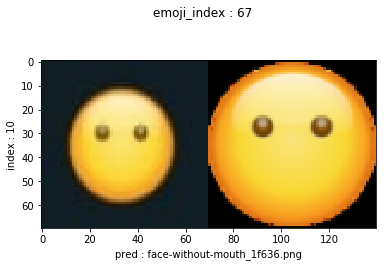

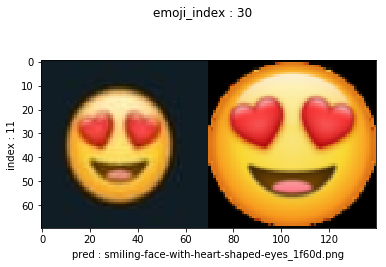

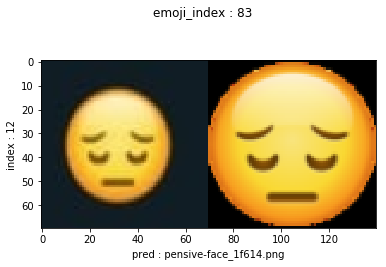

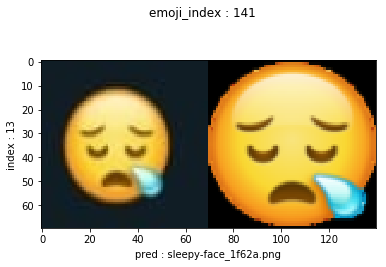

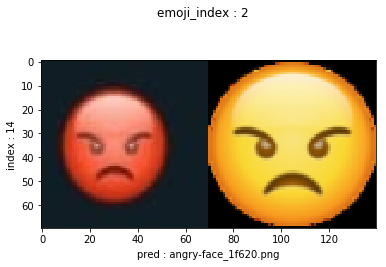

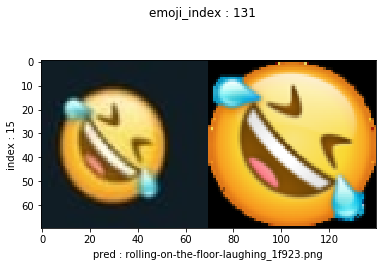

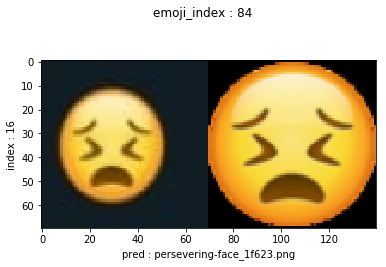

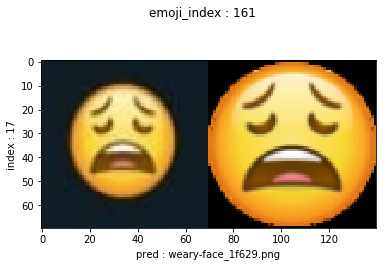

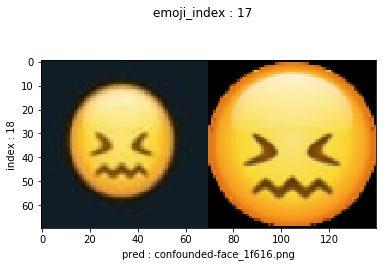

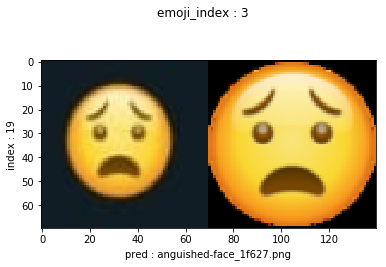

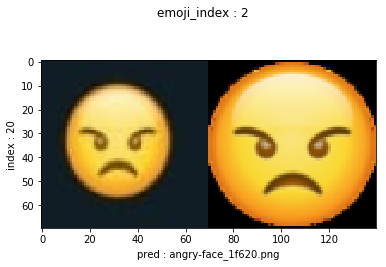

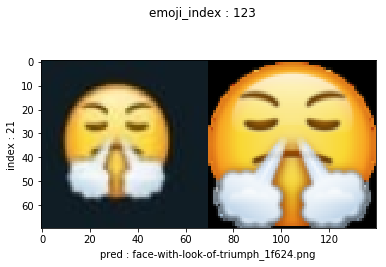

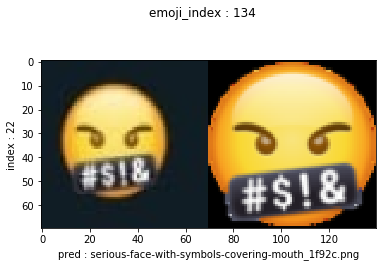

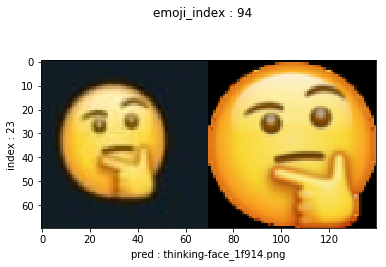

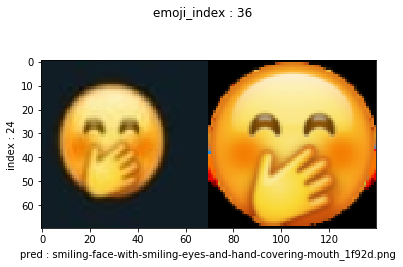

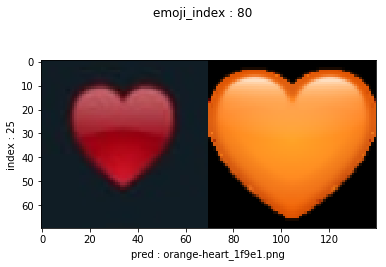

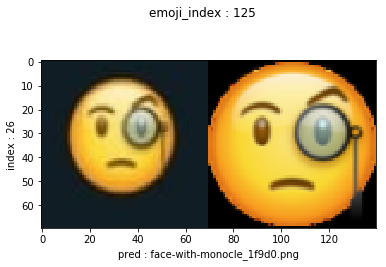

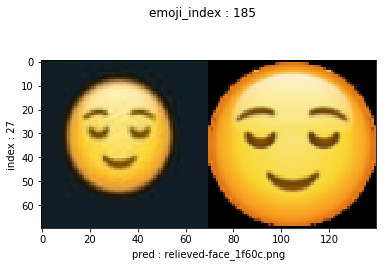

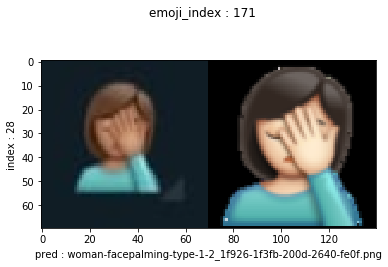

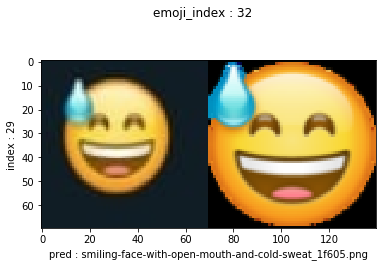

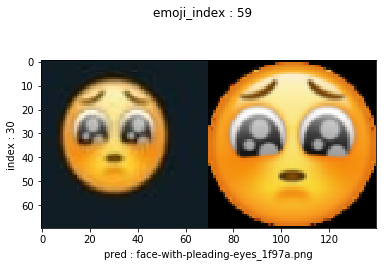

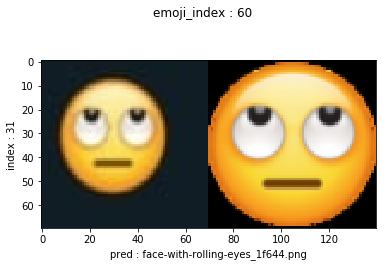

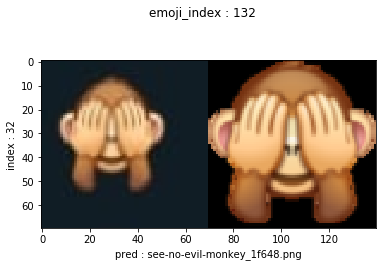

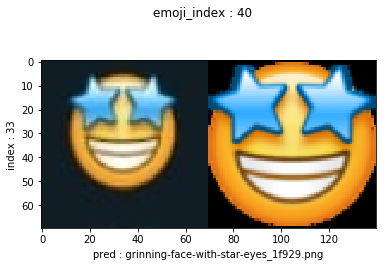

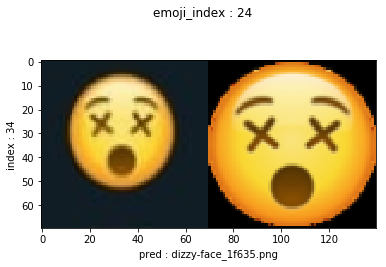

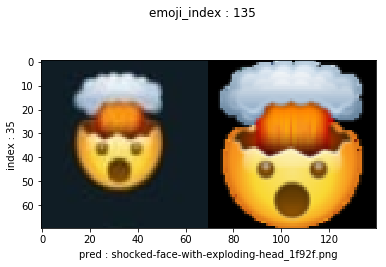

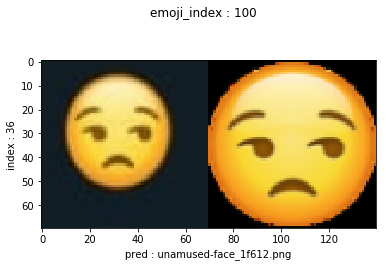

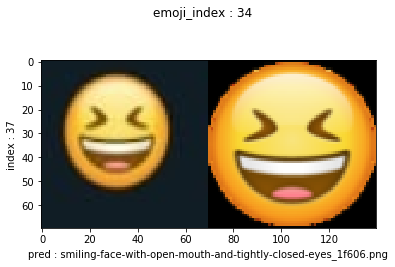

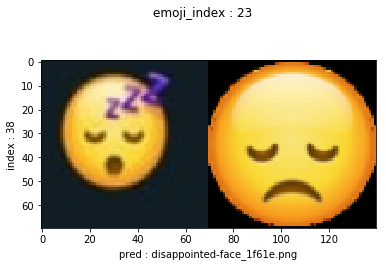

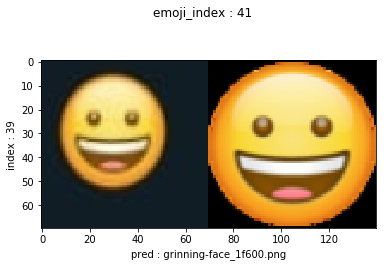

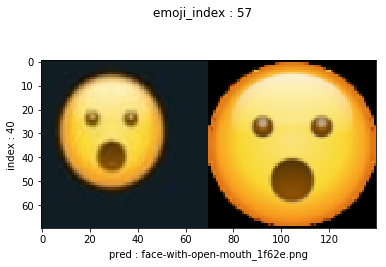

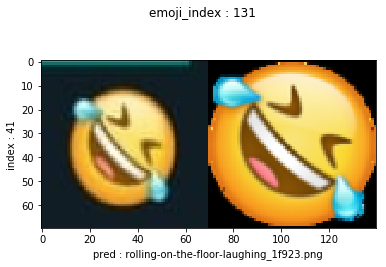

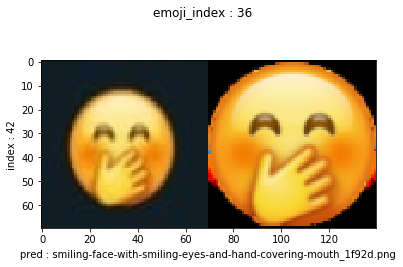

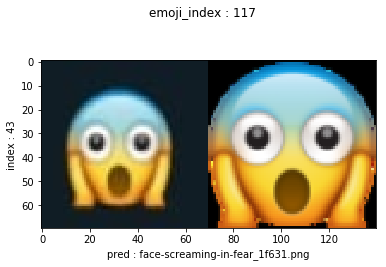

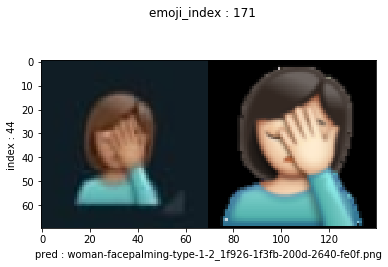

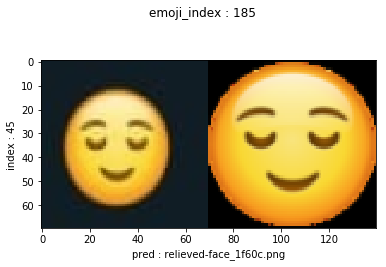

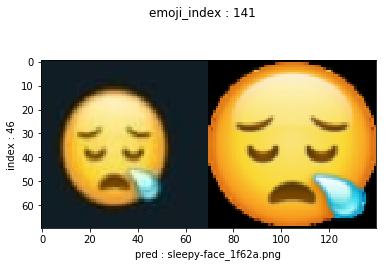

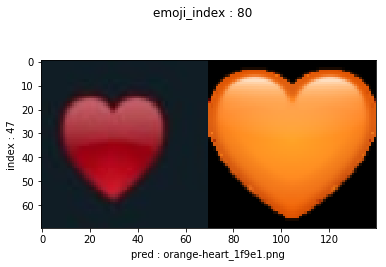

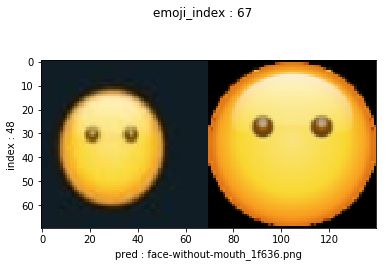

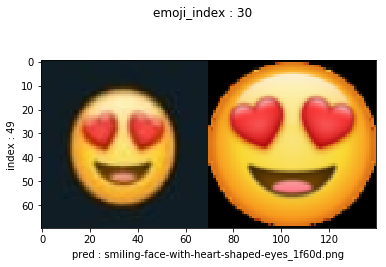

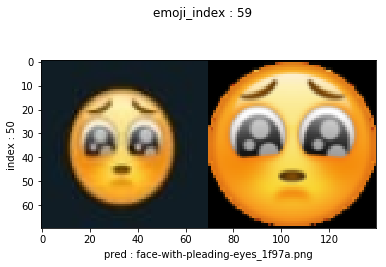

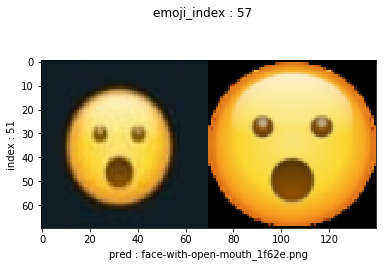

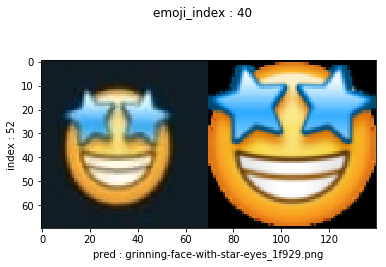

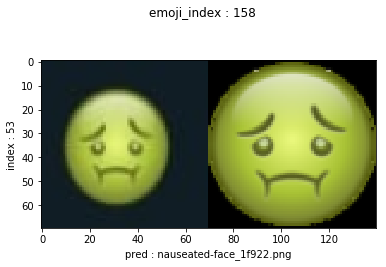

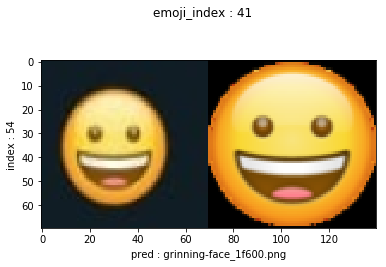

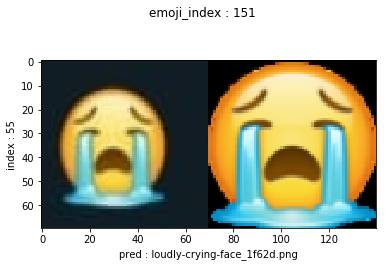

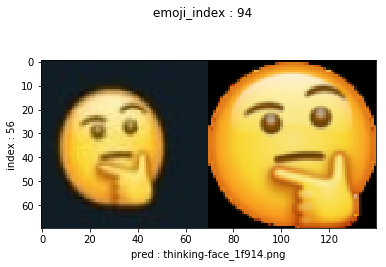

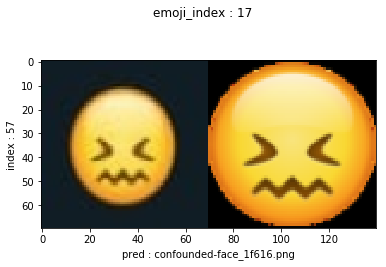

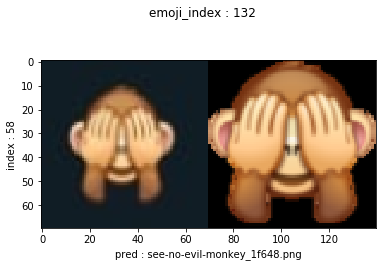

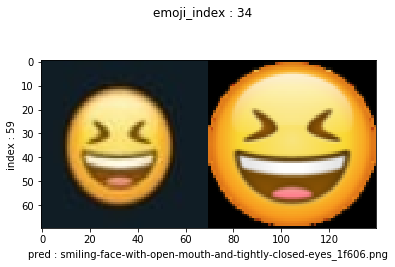

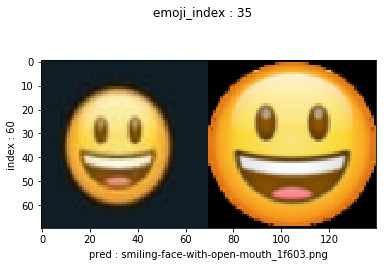

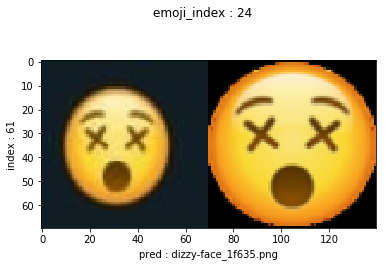

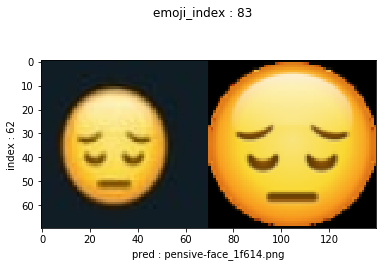

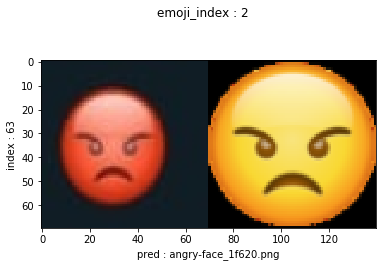

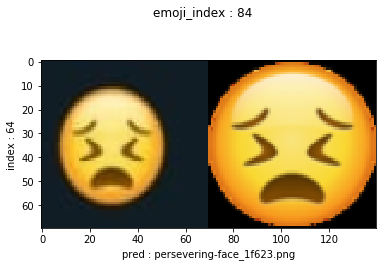

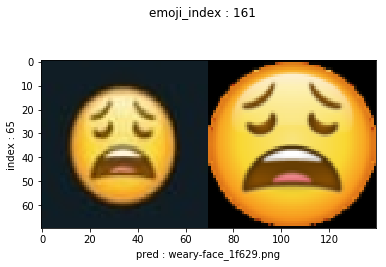

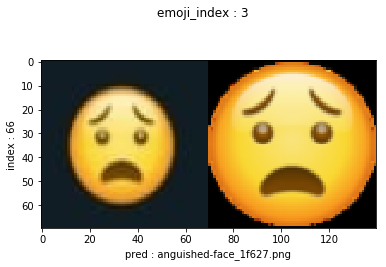

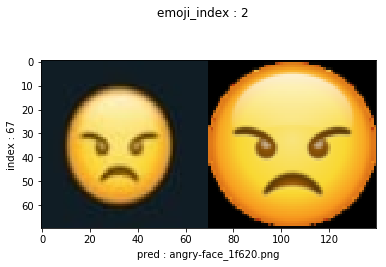

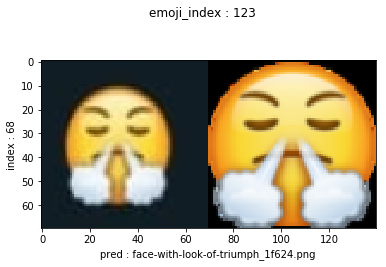

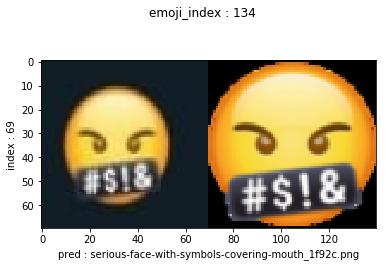

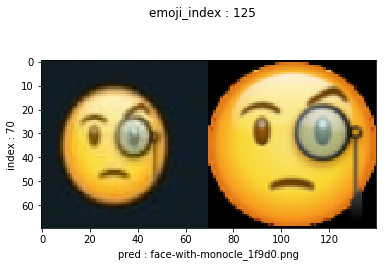

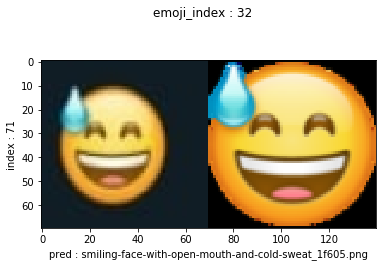

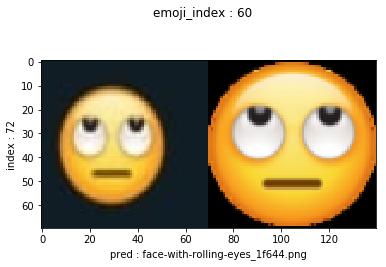

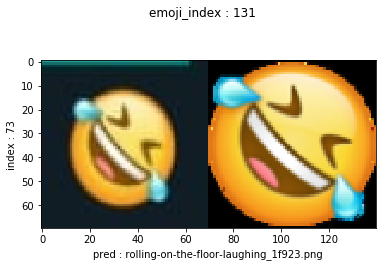

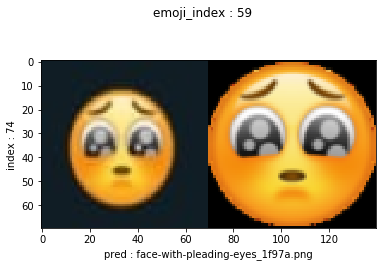

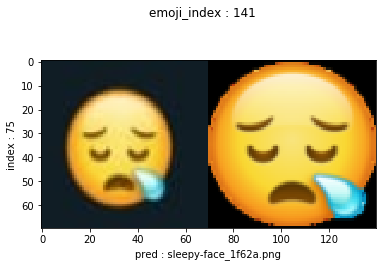

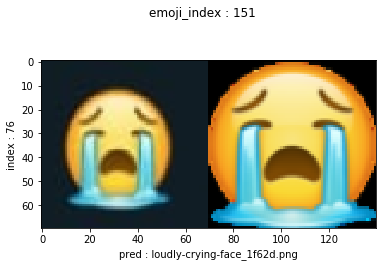

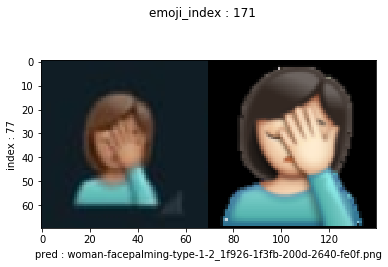

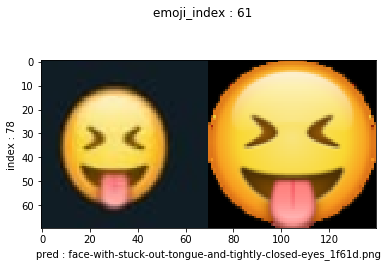

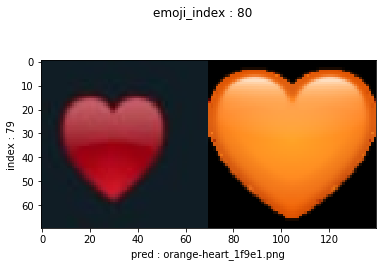

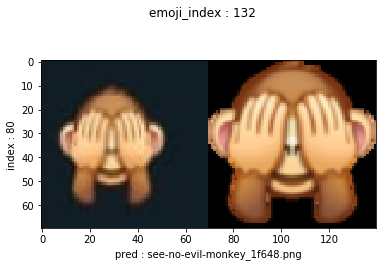

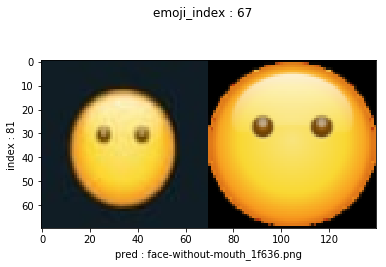

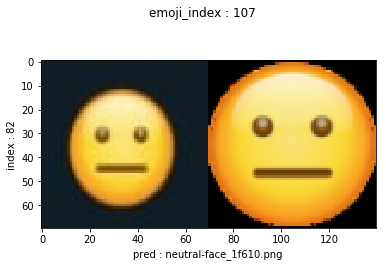

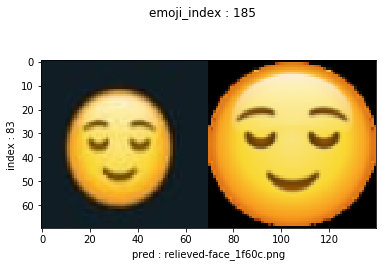

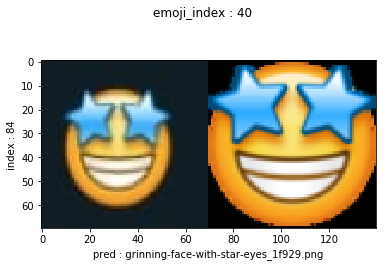

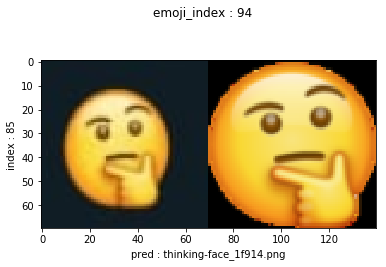

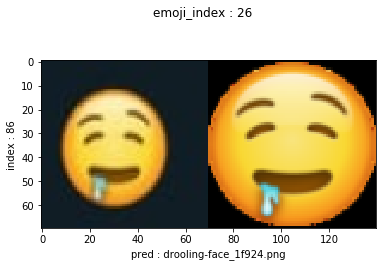

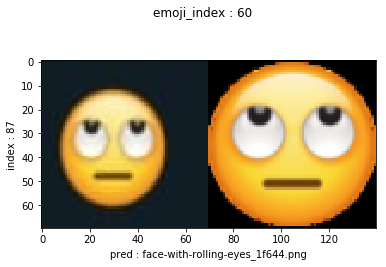

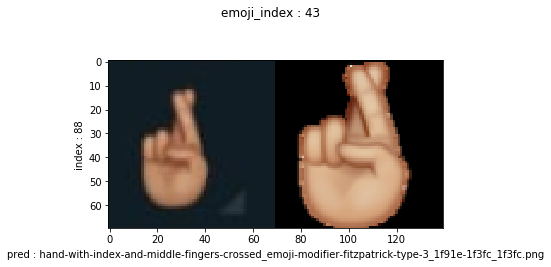

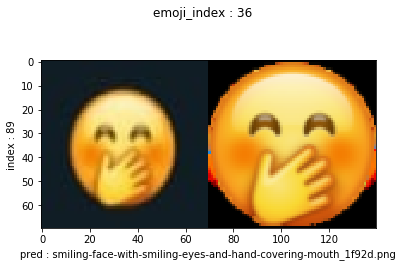

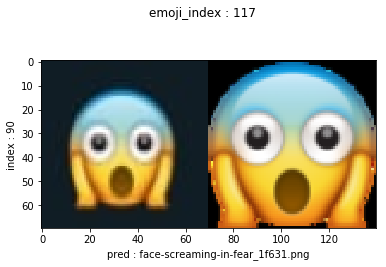

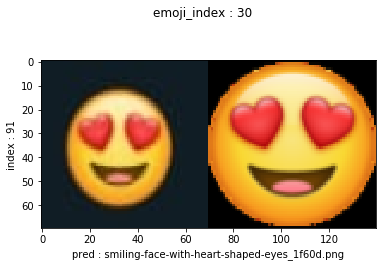

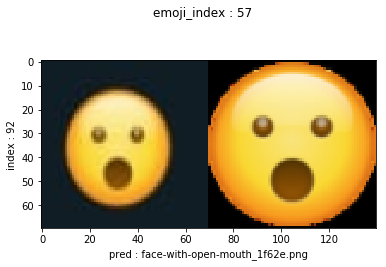

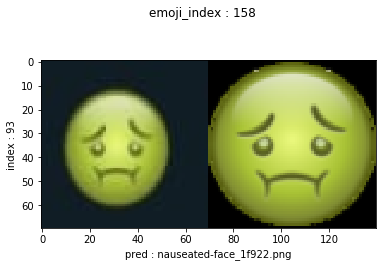

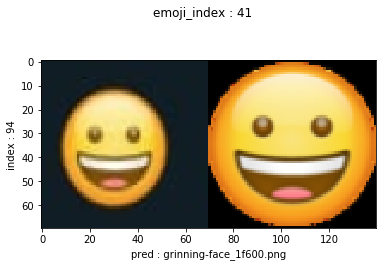

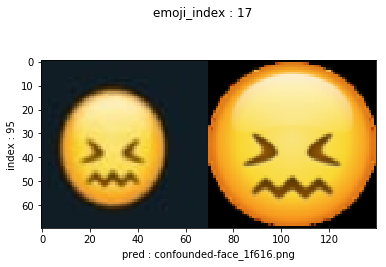

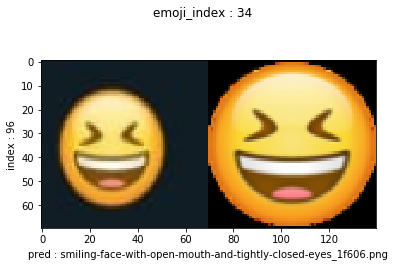

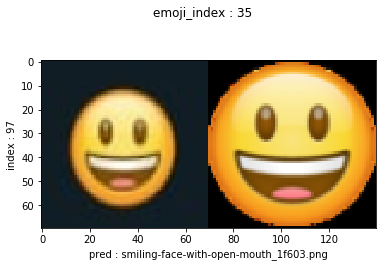

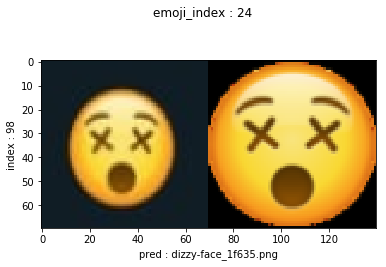

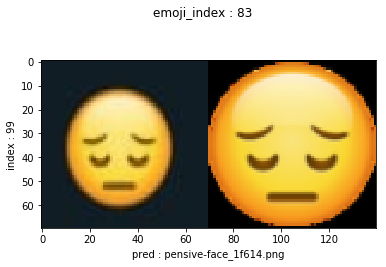

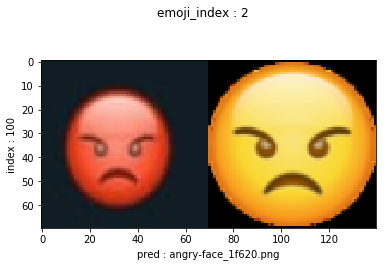

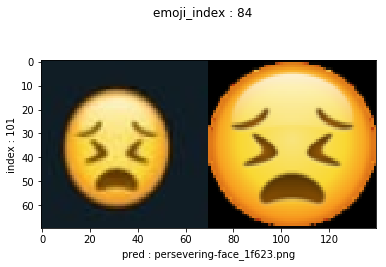

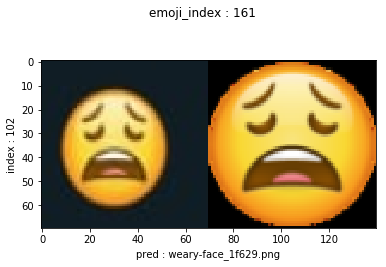

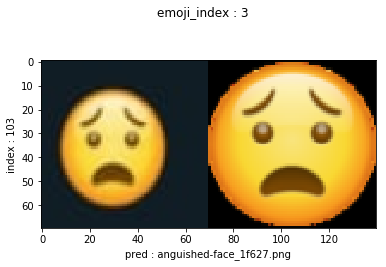

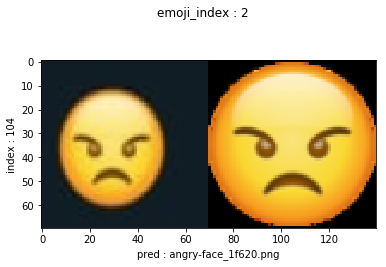

In [386]:
for i in range(len(emoji_list_de_grande[400:])): ##########
    
    # predicting
    predicted_name = unit_emoji_to_name(emoji_list_de_grande[400:][i]) #######
    predicted_path = '../../resource/emoji_database/' + predicted_name
    predicted_img = cv2.imread(predicted_path)
    predicted_img = cv2.resize(predicted_img, (70, 70), interpolation = cv2.INTER_AREA) 
    final_img = np.concatenate((emoji_list_de_grande[400:][i], predicted_img), axis=1) #######
    
    # storing
    predicted_indices_500.append(emoji_index_dict[predicted_name]) ########
    
    # plotting
    plt.imshow(cv2.cvtColor(final_img, cv2.COLOR_BGR2RGB))
    plt.ylabel('index : '+str(i))
    plt.xlabel('pred : '+str(predicted_name))
    plt.suptitle('emoji_index : ' + str(emoji_index_dict[predicted_name]))
    plt.show()

In [393]:
predicted_indices_500[25]

80

In [394]:
emoji_index_dict['heavy-black-heart_2764.png']

49

### le changes de top 500

In [389]:
predicted_indices_500[1] = emoji_index_dict['sleeping-face_1f634.png']

predicted_indices_500[14] = emoji_index_dict['pouting-face_1f621.png']

predicted_indices_500[25] = emoji_index_dict['heavy-black-heart_2764.png']

predicted_indices_500[38] = emoji_index_dict['sleeping-face_1f634.png']

predicted_indices_500[47] = emoji_index_dict['heavy-black-heart_2764.png']

predicted_indices_500[63] = emoji_index_dict['pouting-face_1f621.png']

predicted_indices_500[79] = emoji_index_dict['heavy-black-heart_2764.png']

predicted_indices_500[100] = emoji_index_dict['pouting-face_1f621.png']

### le changes de top 400

In [350]:
predicted_indices_400[12] = emoji_index_dict['white-up-pointing-index_emoji-modifier-fitzpatrick-type-3_261d-1f3fc_1f3fc.png']

predicted_indices_400[17] = emoji_index_dict['heavy-black-heart_2764.png']

predicted_indices_400[20] = emoji_index_dict['sleeping-face_1f634.png']

predicted_indices_400[25] = emoji_index_dict['face-without-mouth_1f636.png']

predicted_indices_400[41] = emoji_index_dict['white-up-pointing-index_emoji-modifier-fitzpatrick-type-3_261d-1f3fc_1f3fc.png']

predicted_indices_400[60] = emoji_index_dict['heavy-black-heart_2764.png']

predicted_indices_400[63] = emoji_index_dict['sleeping-face_1f634.png']

predicted_indices_400[76] = emoji_index_dict['white-up-pointing-index_emoji-modifier-fitzpatrick-type-3_261d-1f3fc_1f3fc.png']

predicted_indices_400[77] = emoji_index_dict['pouting-face_1f621.png']

predicted_indices_400[84] = emoji_index_dict['heavy-black-heart_2764.png']

predicted_indices_400[92] = emoji_index_dict['face-without-mouth_1f636.png']

### le changes de top 100

In [164]:
predicted_indices_100[3] = emoji_index_dict['thumbs-up-sign_emoji-modifier-fitzpatrick-type-3_1f44d-1f3fc_1f3fc.png']

predicted_indices_100[13] = emoji_index_dict['slightly-smiling-face_1f642.png']

predicted_indices_100[19] = emoji_index_dict['hand-with-index-and-middle-fingers-crossed_emoji-modifier-fitzpatrick-type-3_1f91e-1f3fc_1f3fc.png']

predicted_indices_100[35] = emoji_index_dict['pouting-face_1f621.png']

predicted_indices_100[80] = emoji_index_dict['orange-heart_1f9e1.png']

predicted_indices_100[82] = emoji_index_dict['yellow-heart_1f49b.png']

predicted_indices_100[84] = emoji_index_dict['green-heart_1f49a.png']

predicted_indices_100[87] = emoji_index_dict['blue-heart_1f499.png']

predicted_indices_100[95] = emoji_index_dict['man-facepalming-type-1-2_1f926-1f3fb-200d-2642-fe0f.png']

### le changes de top 200

In [243]:
predicted_indices_200[2] = emoji_index_dict['man-shrugging-type-1-2_1f937-1f3fb-200d-2642-fe0f.png']

predicted_indices_200[17] = emoji_index_dict['reversed-hand-with-middle-finger-extended_emoji-modifier-fitzpatrick-type-3_1f595-1f3fc_1f3fc.png']

predicted_indices_200[20] = emoji_index_dict['slightly-frowning-face_1f641.png']

predicted_indices_200[43] = emoji_index_dict['man-facepalming-type-1-2_1f926-1f3fb-200d-2642-fe0f.png']

predicted_indices_200[86] = emoji_index_dict['man-facepalming-type-1-2_1f926-1f3fb-200d-2642-fe0f.png']

### le changes de top 300

In [265]:
predicted_indices_300[5] = emoji_index_dict['pouting-face_1f621.png']

predicted_indices_300[17] = emoji_index_dict['grimacing-face_1f62c.png']

predicted_indices_300[18] = emoji_index_dict['drooling-face_1f924.png']

predicted_indices_300[21] = emoji_index_dict['face-savouring-delicious-food_1f60b.png']

predicted_indices_300[23] = emoji_index_dict['thumbs-up-sign_emoji-modifier-fitzpatrick-type-3_1f44d-1f3fc_1f3fc.png']

predicted_indices_300[25] = emoji_index_dict['dizzy-face_1f635.png']

predicted_indices_300[26] = emoji_index_dict['face-with-open-mouth_1f62e.png']

predicted_indices_300[27] = emoji_index_dict['white-up-pointing-index_emoji-modifier-fitzpatrick-type-3_261d-1f3fc_1f3fc.png']

predicted_indices_300[28] = emoji_index_dict['rolling-on-the-floor-laughing_1f923.png']

predicted_indices_300[29] = emoji_index_dict['smiling-face-with-open-mouth_1f603.png']

predicted_indices_300[30] = emoji_index_dict['smiling-face-with-smiling-eyes-and-hand-covering-mouth_1f92d.png']

predicted_indices_300[31] = emoji_index_dict['crying-face_1f622.png']

predicted_indices_300[32] = emoji_index_dict['face-with-stuck-out-tongue-and-tightly-closed-eyes_1f61d.png']

predicted_indices_300[50] = emoji_index_dict['face-without-mouth_1f636.png']

predicted_indices_300[65] = emoji_index_dict['sleeping-face_1f634.png']

predicted_indices_300[71] = emoji_index_dict['white-up-pointing-index_emoji-modifier-fitzpatrick-type-3_261d-1f3fc_1f3fc.png']

predicted_indices_300[94] = emoji_index_dict['heavy-black-heart_2764.png']

predicted_indices_300[97] = emoji_index_dict['sleeping-face_1f634.png']

##### Removing the the indices which does not have the corresponding emojis in the database

In [346]:
remove_list = []

In [362]:
remove_list.append(44)

In [377]:
remove_list

[43, 44]

##### Printing

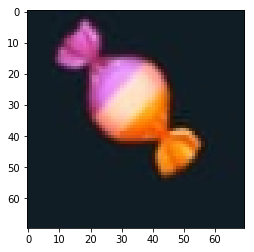

In [182]:
plt.imshow(cv2.cvtColor(emoji_list_de_grande[18], cv2.COLOR_BGR2RGB))
plt.show()

In [401]:
# pickling 
#remove_list_400 = remove_list

#with open('../../lib/remove_list_400.pickle', 'wb') as handle:
#    pickle.dump(remove_list_400, handle, protocol=pickle.HIGHEST_PROTOCOL)

with open('../../lib/predicted_indices_500.pickle', 'wb') as handle:
    pickle.dump(predicted_indices_500, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [402]:

#with open('../../lib/remove_list_400.pickle', 'rb') as handle:
#    remove_list_400 = pickle.load(handle)

with open('../../lib/predicted_indices_500.pickle', 'rb') as handle:
    predicted_indices_500 = pickle.load(handle)

In [228]:
#final_images = []
#final_labels = []

In [403]:
len(emoji_list_de_grande[400:])

105

In [404]:
for i in range(105):    ###########??
    #if i not in remove_list_500:                ################
        final_images.append(emoji_list_de_grande[400:][i])  ###########
        final_labels.append(predicted_indices_500[i])          ###########

In [410]:
len(final_images)

469

### Dumping images and labels with pickle

In [407]:
# dumping
with open('../../lib/final_images.pickle', 'wb') as handle:
    pickle.dump(final_images, handle, protocol=pickle.HIGHEST_PROTOCOL)

with open('../../lib/final_labels.pickle', 'wb') as handle:
    pickle.dump(final_labels, handle, protocol=pickle.HIGHEST_PROTOCOL)


In [13]:
# reopening
with open('../lib/final_images.pickle', 'rb') as handle:
    final_images = pickle.load(handle)

with open('../lib/final_labels.pickle', 'rb') as handle:
    final_labels = pickle.load(handle)

In [14]:
final_images = np.array(final_images)
final_labels = np.array(final_labels)

### Deep CNN

In [15]:
# Basic Imports
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.utils import to_categorical

import numpy as np
import matplotlib.pyplot as plt

/home/subhasish/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/subhasish/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/subhasish/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/subhasish/anaconda3/lib/python3.6/site-packages/tensorflow/python/f

In [16]:
train_images, test_images = final_images[:400], final_images[400:]
train_labels, test_labels = final_labels[:400], final_labels[400:]

In [17]:
test_labels.shape

(69,)

In [33]:
# Build the model.

def build_model():
    model = Sequential([
      Conv2D(64, kernel_size=(3, 3), strides= (1,1), activation='relu', input_shape=(70, 70, 3), kernel_initializer='he_normal'), 
      MaxPooling2D(pool_size=(2, 2), strides= (2,2)),   
      Dense(128, activation='relu'),
      Dense(187, activation='softmax'),
    ])
    return model

In [38]:
my_cnn = build_model()

In [39]:
my_cnn.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 68, 68, 64)        1792      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 34, 34, 64)        0         
_________________________________________________________________
dense_8 (Dense)              (None, 34, 34, 128)       8320      
_________________________________________________________________
dense_9 (Dense)              (None, 34, 34, 187)       24123     
Total params: 34,235
Trainable params: 34,235
Non-trainable params: 0
_________________________________________________________________


In [36]:
my_cnn.compile(
  loss = 'sparse_categorical_crossentropy',
  metrics=['accuracy'],
  optimizer='adam'
)


In [37]:
trained_model = my_cnn.fit(
                train_images,
                train_labels,
                epochs=25,
                validation_data=(test_images, test_labels))


ValueError: Error when checking target: expected dense_7 to have 4 dimensions, but got array with shape (400, 1)